### 10.1: Decomposing Time Series


<center>
    <img src = 'images/spots.png' /><img src = 'images/air.png' />
</center>


 

This activity fouses on exploring two different time series and the decomposed elements.  The example of sunspots data is given as well as a dataset containing air passenger information through the twentieth century in the United States.  These are both time series datasets however there is a distinct difference in the nature of the time series.  

Below, you are to use the statsmodels function `seasonal_decompose` to show how the trend and seasonality of the series differ in (perhaps) expected ways.  To begin, you are to make sure the datasets contain an appropriate time stamp index -- statsmodels expects this.  Then, use the `seasonal_decompose` function to decompose the series into trend and seasonality.  Examing plots of these elements, and discuss the similarities and differences between these components for the two time series.

### Import Libraries and Datasets

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Import the datasets (Sunspots and Air Passengers) and assign them to variables.

In [3]:
sunspots = sm.datasets.sunspots.load_pandas()
air = pd.read_csv('data/AirPassengers.csv')

#### Data Exploration, Cleaning and Preparation (Air Passengers)

In [11]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [12]:
air.shape

(144, 2)

In [13]:
air.columns

Index(['Month', '#Passengers'], dtype='object')

In [14]:
air.dtypes

Month          datetime64[ns]
#Passengers             int64
dtype: object

In [4]:
air.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [6]:
air.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [7]:
air.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [8]:
air['Month'] = pd.to_datetime(air['Month'])
print(air.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    datetime64[ns]
 1   #Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB
None


Now some analysis and preparation of the **sunspots** data.

In [16]:
sunspots.data

,YEAR,SUNACTIVITY
0,1700-01-01,5.0
1,1701-01-01,11.0
2,1702-01-01,16.0
3,1703-01-01,23.0
4,1704-01-01,36.0
...,...,...
304,2004-01-01,40.4
305,2005-01-01,29.8
306,2006-01-01,15.2
307,2007-01-01,7.5


In [17]:
df_sunspots = sunspots.data
df_sunspots['YEAR'] = pd.to_datetime(df_sunspots['YEAR'],format='%Y')
print(df_sunspots.info())
df_sunspots.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   YEAR         309 non-null    datetime64[ns]
 1   SUNACTIVITY  309 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB
None


,YEAR,SUNACTIVITY
0,1700-01-01,5.0
1,1701-01-01,11.0
2,1702-01-01,16.0
3,1703-01-01,23.0
4,1704-01-01,36.0
5,1705-01-01,58.0
6,1706-01-01,29.0
7,1707-01-01,20.0
8,1708-01-01,10.0
9,1709-01-01,8.0


In [19]:
def plot_seasonal_dec(seasonal_dec_object = None, plot_size = (10, 15), title = None ):
    plt.figure(figsize=plot_size)
    
    plt.subplot(6, 1, 1)
    plt.title(title, fontsize = 15)
    sns.lineplot(data = seasonal_dec_object.observed, color = '#27374D')
    plt.ylabel('Observed')
    
    plt.subplot(6, 1, 2)
    sns.lineplot(data = seasonal_dec_object.trend, color = '#176B87')
    plt.ylabel('Trend')

    plt.subplot(6, 1, 3)
    sns.lineplot(data = seasonal_dec_object.seasonal, color = '#2E8A99')
    plt.ylabel('Seasonality')

    plt.subplot(6, 1, 4)
    sns.lineplot(data = seasonal_dec_object.resid, color = '#C70039')
    plt.ylabel('Residuals')

    plt.subplot(6, 1, 5)
    pd.plotting.autocorrelation_plot(pd.Series(seasonal_dec_object.observed), color = '#F94C10')
    plt.ylabel('Autocorrelation')

    #plt.subplot(6, 1, 6)
    #sns.lineplot(data = seasonal_dec_object.observed)
    #sns.lineplot(data = seasonal_dec_object.trend)
    #sns.lineplot(data = seasonal_dec_object.seasonal)
    #plt.ylabel('All The Above')

### Seasonal Decomposition for the Sunspots and Air Passengers Datasets

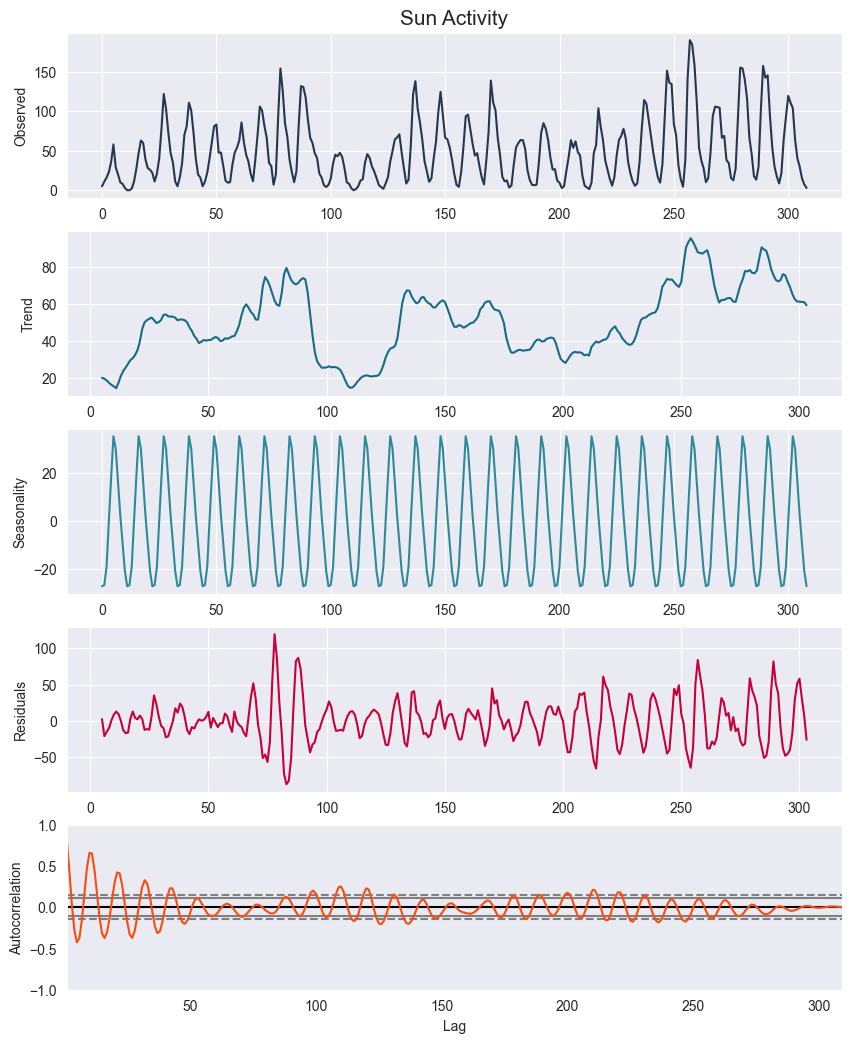

In [21]:
sd_sp = seasonal_decompose(df_sunspots['SUNACTIVITY'], model = 'additive', period = 11)
plot_seasonal_dec(seasonal_dec_object = sd_sp, plot_size = (10, 15), title = 'Sun Activity')

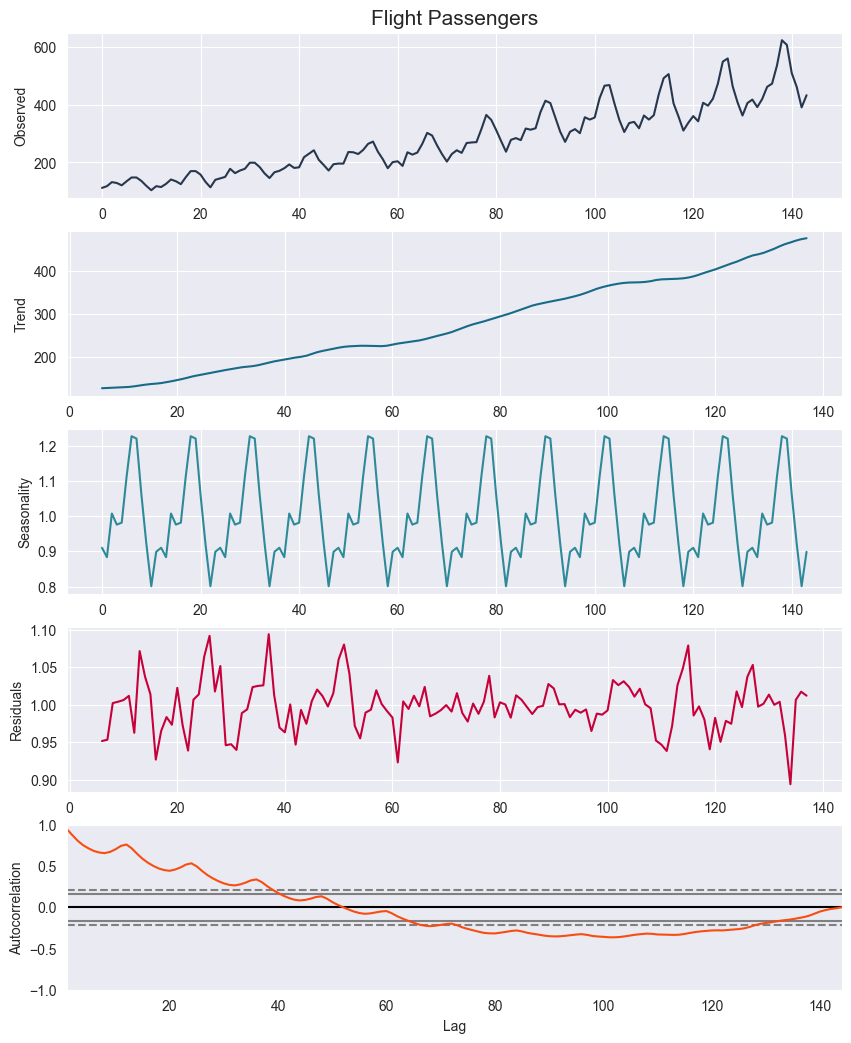

In [22]:
air_sp = seasonal_decompose(air['#Passengers'], model = 'multiplicative', period = 12) #'multiplicative'
plot_seasonal_dec(seasonal_dec_object = air_sp, plot_size = (10, 15), title = 'Flight Passengers')